## Data cleaning

In [39]:
#importation de biblioteques

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# loading dataset

data = pd.read_csv("../dataset.csv", sep=';')


In [41]:
# preview
# ['Code IRIS','Nom IRIS','Libellé de voie']
# data = data.drop(columns=['Libellé de voie'])

data = data[['Adresse','Année','Code Commune','Segment de client','Nombre de logements',"Consommation annuelle totale de l'adresse (MWh)","Consommation annuelle moyenne par logement de l'adresse (MWh)","Consommation annuelle moyenne de la commune (MWh)",'Code Département','Code Région']]
data.head()

,Adresse,Année,Code Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Code Département,Code Région
0,4 RUE MARCEAU DELORME,2019,92004,RESIDENTIEL,20,50.322,2.516,3.272,92.0,11.0
1,2 RUE MARIA MONTESSORI,2019,92004,RESIDENTIEL,36,195.247,5.424,3.272,92.0,11.0
2,56 RUE MAURICE BOKANOWSKI,2019,92004,RESIDENTIEL,13,24.689,1.899,3.272,92.0,11.0
3,38 RUE MAURICE BOKANOWSKI,2019,92004,RESIDENTIEL,13,26.807,2.062,3.272,92.0,11.0
4,5 RUE MAURICE BOKANOWSKI,2019,92004,RESIDENTIEL,11,24.715,2.247,3.272,92.0,11.0


In [42]:
print(f"taille du dataframe{data.shape}")

taille du dataframe(20000, 10)


In [43]:
data.describe()

,Année,Code Commune,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Code Département,Code Région
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,19998.000000,19998.000000
mean,2018.87460,59509.689850,22.126250,59.581981,2.809250,3.626504,59.401740,49.184618
std,0.33118,29919.637972,22.171849,66.334152,1.742617,0.943382,29.921929,33.286574
min,2018.00000,1014.000000,10.000000,0.351000,0.023000,1.665000,1.000000,11.000000
25%,2019.00000,33063.000000,12.000000,25.118250,1.650000,2.985000,33.000000,11.000000
50%,2019.00000,69123.000000,16.000000,40.301500,2.206000,3.415000,69.000000,44.000000
75%,2019.00000,91122.000000,24.000000,68.855500,3.525250,3.970000,91.000000,84.000000
max,2019.00000,95428.000000,810.000000,1643.108000,28.784000,11.608000,95.000000,93.000000


In [44]:
# information basique du datasets comme type de donnee pour colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Adresse                                                        20000 non-null  object 
 1   Année                                                          20000 non-null  int64  
 2   Code Commune                                                   20000 non-null  int64  
 3   Segment de client                                              20000 non-null  object 
 4   Nombre de logements                                            20000 non-null  int64  
 5   Consommation annuelle totale de l'adresse (MWh)                20000 non-null  float64
 6   Consommation annuelle moyenne par logement de l'adresse (MWh)  20000 non-null  float64
 7   Consommation annuelle moyenne de la commune (MWh)         

In [45]:
# porcentage de valeur null pour columne

percent_null= data.isnull().sum()*100 / len(data)
percent_null.sort_values(ascending=False,inplace=True)

percent_null.head(10)

Code Région                                                      0.01
Code Département                                                 0.01
Année                                                            0.00
Adresse                                                          0.00
Code Commune                                                     0.00
Segment de client                                                0.00
Consommation annuelle totale de l'adresse (MWh)                  0.00
Nombre de logements                                              0.00
Consommation annuelle moyenne de la commune (MWh)                0.00
Consommation annuelle moyenne par logement de l'adresse (MWh)    0.00
dtype: float64

Text(0.5, 1.0, 'Répartition du pourcentage de valeurs manquantessupérieures au seuil de {threshold_view}%')

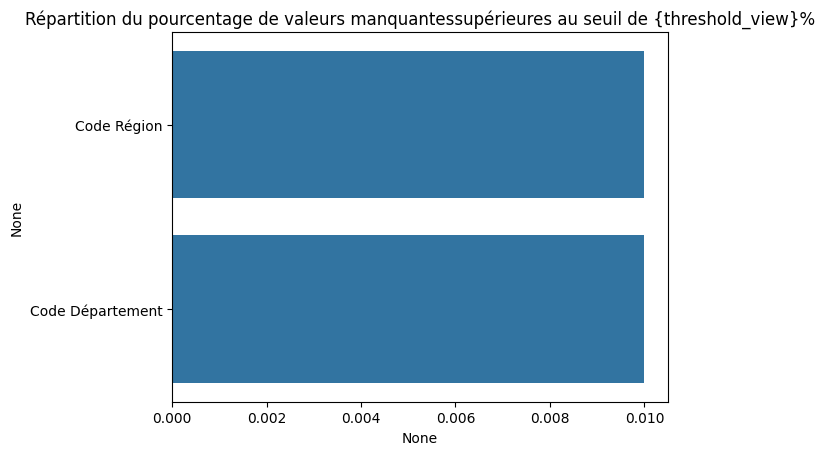

In [46]:
# visualisation de porcentage en forme ascendete

threshold_view = 0.0

filtered = percent_null[percent_null.values > threshold_view]
ax = sns.barplot(x = filtered, y = filtered.index, orient='h');
ax.set_title(f"Répartition du pourcentage de valeurs manquantes"
             "supérieures au seuil de {threshold_view}%")


il y a plus de 19000 valeurs null dans cette colonne

Supprimer les valeurs nulles du DataFrame

In [47]:
# supprimir valeur null du data frame
data.dropna(inplace=True)

In [48]:
# verification de valeur nul
valeur_nul= data.isnull().sum()
valeur_nul.head(19)

Adresse                                                          0
Année                                                            0
Code Commune                                                     0
Segment de client                                                0
Nombre de logements                                              0
Consommation annuelle totale de l'adresse (MWh)                  0
Consommation annuelle moyenne par logement de l'adresse (MWh)    0
Consommation annuelle moyenne de la commune (MWh)                0
Code Département                                                 0
Code Région                                                      0
dtype: int64

Tranformation de type de donnees

In [49]:
# type de valeurs float a int
data[['Code Département', 'Code Région','Année']]=data[['Code Département', 'Code Région', 'Année']].astype(int)

## Encodage des etiquettes

In [50]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [51]:
data_categ=data[['Code Commune','Segment de client','Code Département','Code Région']]
data_addres= data['Adresse']


In [52]:
one_hot = OneHotEncoder()
one_hot.fit(data_categ)

OneHotEncoder()

In [53]:
encoded_features = one_hot.transform(data_categ).toarray()
encoded_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [54]:
encoded_features_names = one_hot.get_feature_names_out()
encoded_features_names

array(['Code Commune_1014', 'Code Commune_1024', 'Code Commune_1027', ...,
       'Code Région_76', 'Code Région_84', 'Code Région_93'], dtype=object)

In [55]:
data_one_hot= pd.DataFrame(encoded_features,
            columns = encoded_features_names)

In [56]:
data_one_hot.head()

,Code Commune_1014,Code Commune_1024,Code Commune_1027,Code Commune_1032,Code Commune_1038,Code Commune_1043,Code Commune_1047,Code Commune_1053,Code Commune_1065,Code Commune_1069,...,Code Région_27,Code Région_28,Code Région_32,Code Région_44,Code Région_52,Code Région_53,Code Région_75,Code Région_76,Code Région_84,Code Région_93
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
def plot_all_numerique(df):
    # Filtre les columns numeriques
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        plt.figure(figsize=(14, 5))  # Taille des graphes

        # Histograme con KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col} - Histogram')  # Títre específique
        plt.xlabel('')  # axis X vide
        plt.ylabel('')  # axis  Y vide

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Distribution of {col} - Boxplot')  # Títre específique
        plt.xlabel('')  # # axis X vide
        plt.ylabel('')  # # axis Y vide

        plt.suptitle(f'Distribution Analysis for {col}', fontsize=16)  # Títre general
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste l'espace du titre
        plt.show()


In [58]:
#plot_all_numerique(data)

## Selection des colonnees numeriques pour encodage

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [60]:
# separation de un dataframe numerique
data_numerique=data.select_dtypes(include=[np.number])
data_numerique.columns

Index(['Année', 'Code Commune', 'Nombre de logements',
       'Consommation annuelle totale de l'adresse (MWh)',
       'Consommation annuelle moyenne par logement de l'adresse (MWh)',
       'Consommation annuelle moyenne de la commune (MWh)', 'Code Département',
       'Code Région'],
      dtype='object')

In [61]:
# list des colonnes pour aplique methode robustscaler
list_robustscaler=['Nombre de logements',"Consommation annuelle totale de l'adresse (MWh)",
       "Consommation annuelle moyenne par logement de l'adresse (MWh)",
       "Consommation annuelle moyenne de la commune (MWh)"]

In [62]:
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

In [80]:
print(f"Nombre de logements:,{determine_outlier_thresholds_iqr(data_numerique, "Nombre de logements")}")
print(f"Consommation annuelle totale de l'adresse (MWh):,{determine_outlier_thresholds_iqr(data_numerique, "Consommation annuelle totale de l'adresse (MWh)")}")
print(f"Consommation annuelle moyenne par logement de l'adresse (MWh):,{determine_outlier_thresholds_iqr(data_numerique, "Consommation annuelle moyenne par logement de l'adresse (MWh)")}")
print(f"moyenne de la commune (MWh):,{determine_outlier_thresholds_iqr(data_numerique, "Consommation annuelle moyenne de la commune (MWh)")}")

Nombre de logements:,(np.float64(-6.0), np.float64(42.0))
Consommation annuelle totale de l'adresse (MWh):,(np.float64(-40.49487499999999), np.float64(134.480125))
Consommation annuelle moyenne par logement de l'adresse (MWh):,(np.float64(-1.1636250000000001), np.float64(6.339375))
moyenne de la commune (MWh):,(np.float64(1.5074999999999994), np.float64(5.447500000000001))


In [29]:
# application de methode robustscaler

rbscaler = RobustScaler()
for col in list_robustscaler:
    data_numerique[col] = rbscaler.fit_transform(data_numerique.loc[:,[col]])


In [36]:
data_numerique.describe()

,Année,Code Commune,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Code Département,Code Région
count,19998.000000,19998.000000,19998.000000,19998.000000,1.999800e+04,19998.000000,19998.000000,19998.000000
mean,2018.874637,59510.930193,0.510559,0.440823,3.214069e-01,0.214569,59.401740,49.184618
std,0.331138,29919.756356,1.847741,1.516483,9.290449e-01,0.957662,29.921929,33.286574
min,2018.000000,1014.000000,-0.500000,-0.913296,-1.164068e+00,-1.776650,1.000000,11.000000
25%,2019.000000,33063.000000,-0.333333,-0.347050,-2.966813e-01,-0.436548,33.000000,11.000000
50%,2019.000000,69123.000000,0.000000,0.000000,-1.183407e-16,0.000000,69.000000,44.000000
75%,2019.000000,91122.000000,0.666667,0.652950,7.033187e-01,0.563452,91.000000,84.000000
max,2019.000000,95428.000000,66.166667,36.640800,1.416900e+01,8.317766,95.000000,93.000000


In [33]:
#Concatenation de data
data_transforme= pd.concat([data_one_hot, 
                            data_numerique[['Nombre de logements',"Consommation annuelle totale de l'adresse (MWh)",
                            "Consommation annuelle moyenne par logement de l'adresse (MWh)",
                            "Consommation annuelle moyenne de la commune (MWh)"]], 
                            data_addres], axis=1)

In [34]:
data_transforme.head()

,Code Commune_1014,Code Commune_1024,Code Commune_1027,Code Commune_1032,Code Commune_1038,Code Commune_1043,Code Commune_1047,Code Commune_1053,Code Commune_1065,Code Commune_1069,...,Code Région_53,Code Région_75,Code Région_76,Code Région_84,Code Région_93,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,50.322,2.516,3.272,4 RUE MARCEAU DELORME
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,36.0,195.247,5.424,3.272,2 RUE MARIA MONTESSORI
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,24.689,1.899,3.272,56 RUE MAURICE BOKANOWSKI
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,26.807,2.062,3.272,38 RUE MAURICE BOKANOWSKI
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,24.715,2.247,3.272,5 RUE MAURICE BOKANOWSKI


In [74]:
# exportation de dataframe
#data_transforme.to_csv('clean_data.csv')

In [31]:
# jules est con

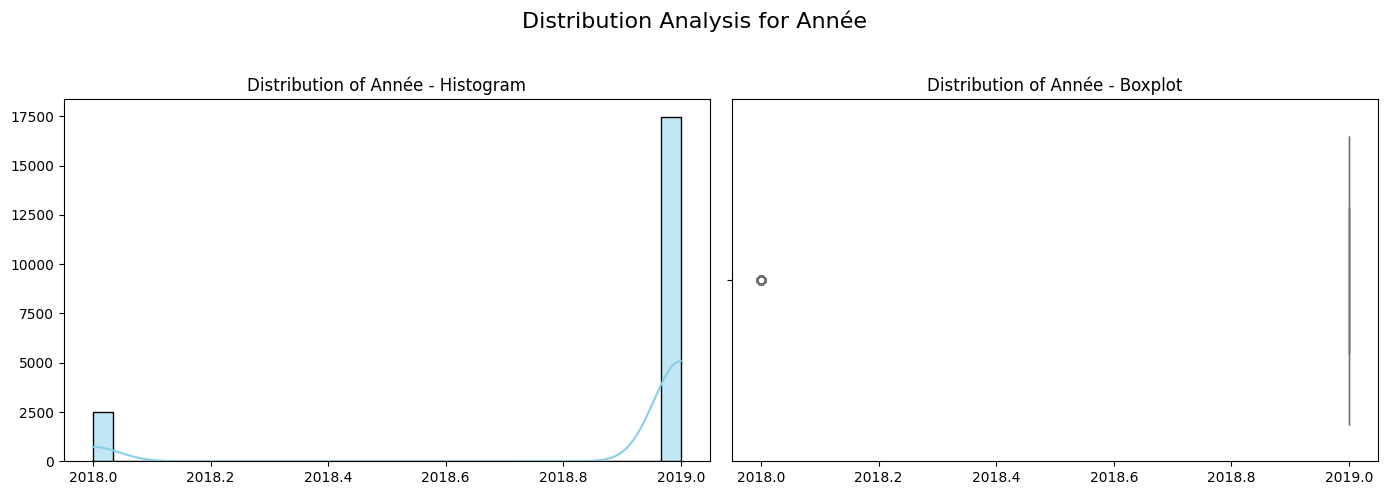

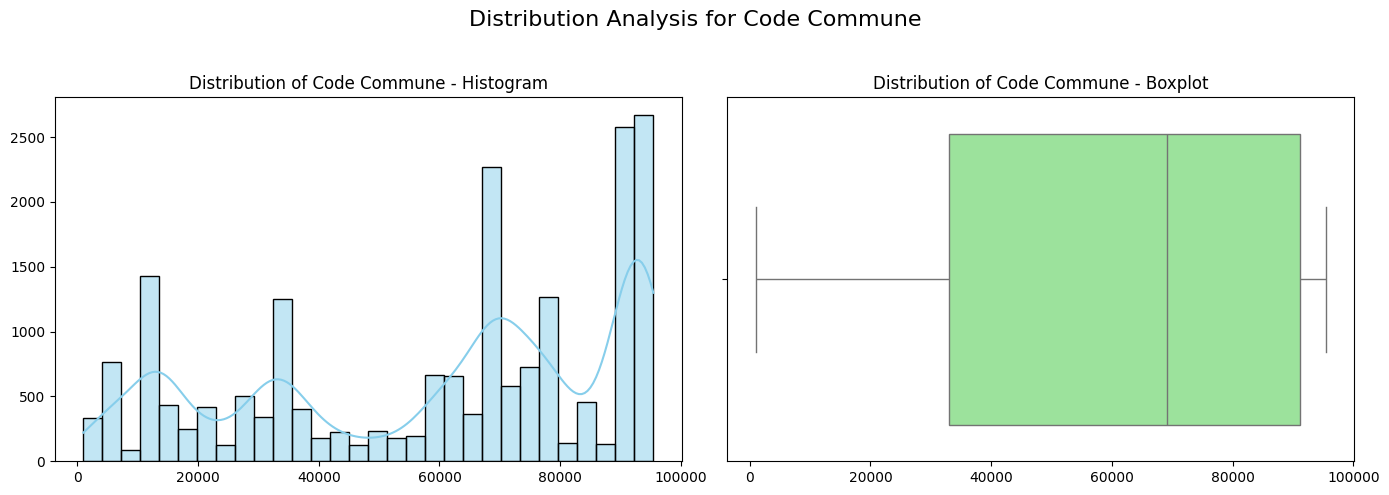

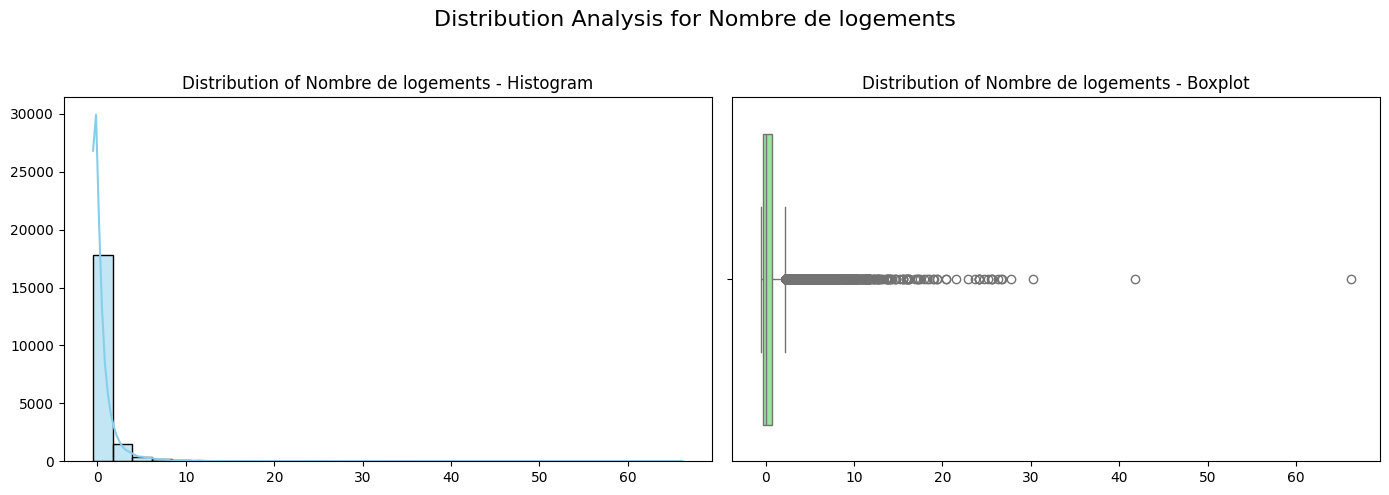

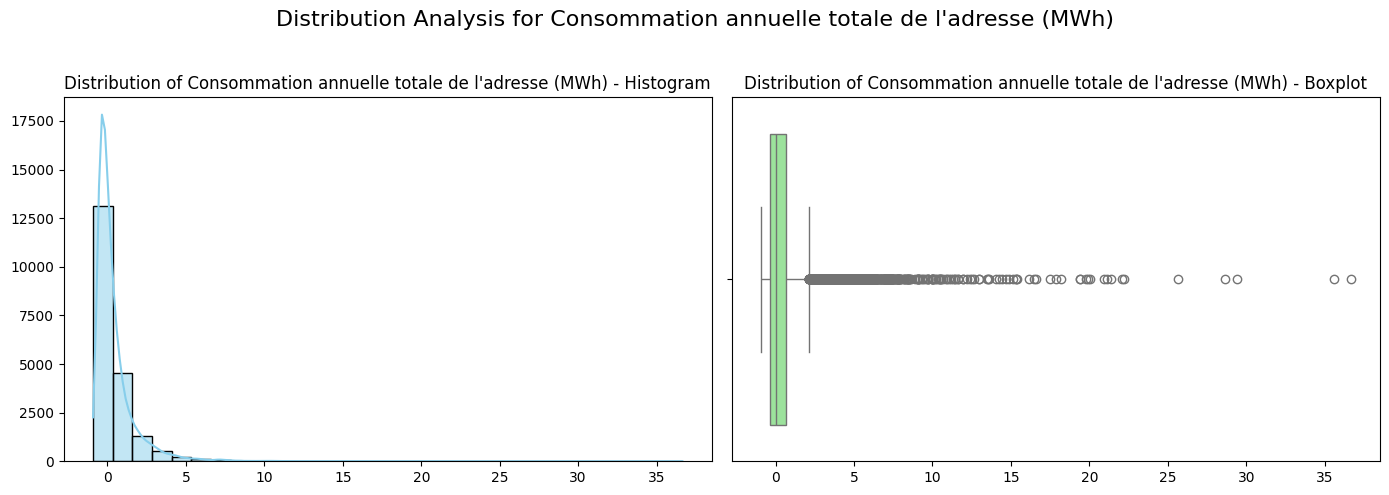

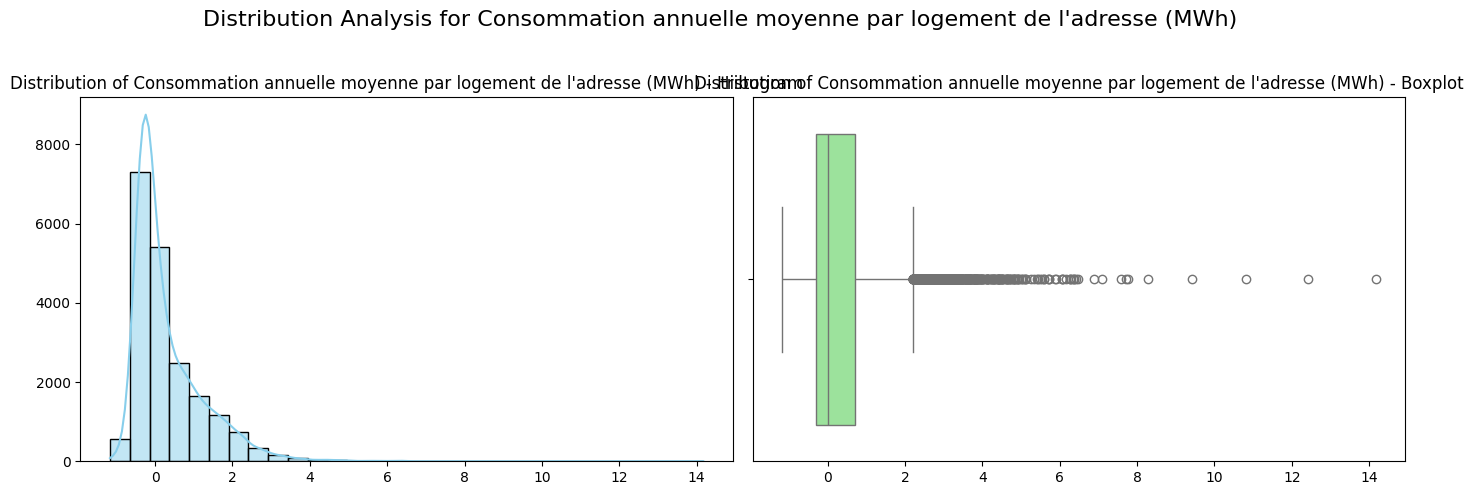

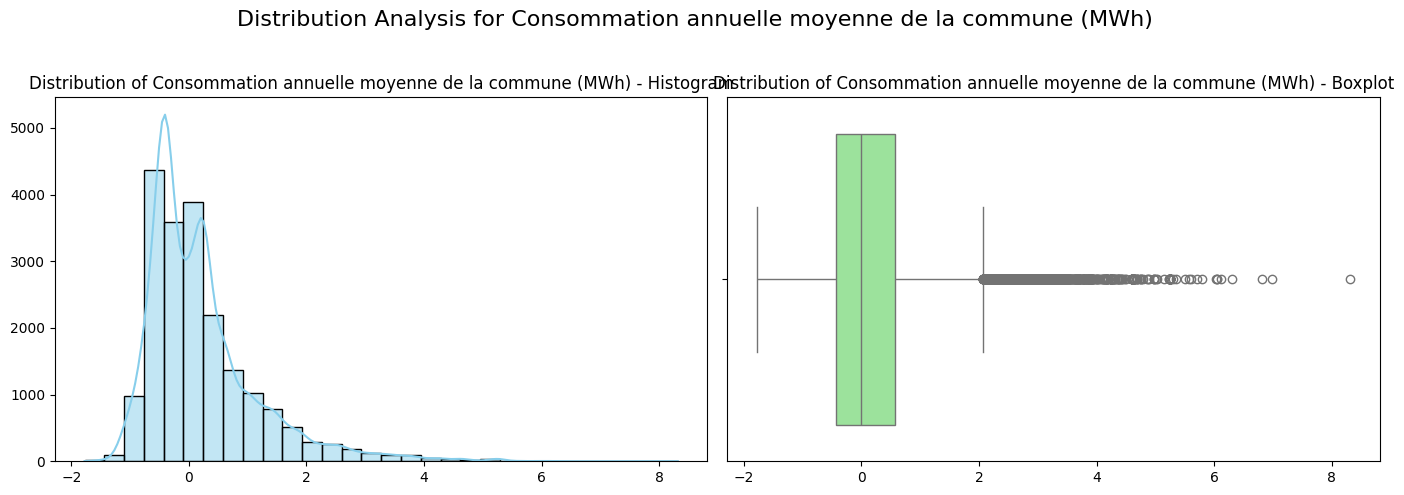

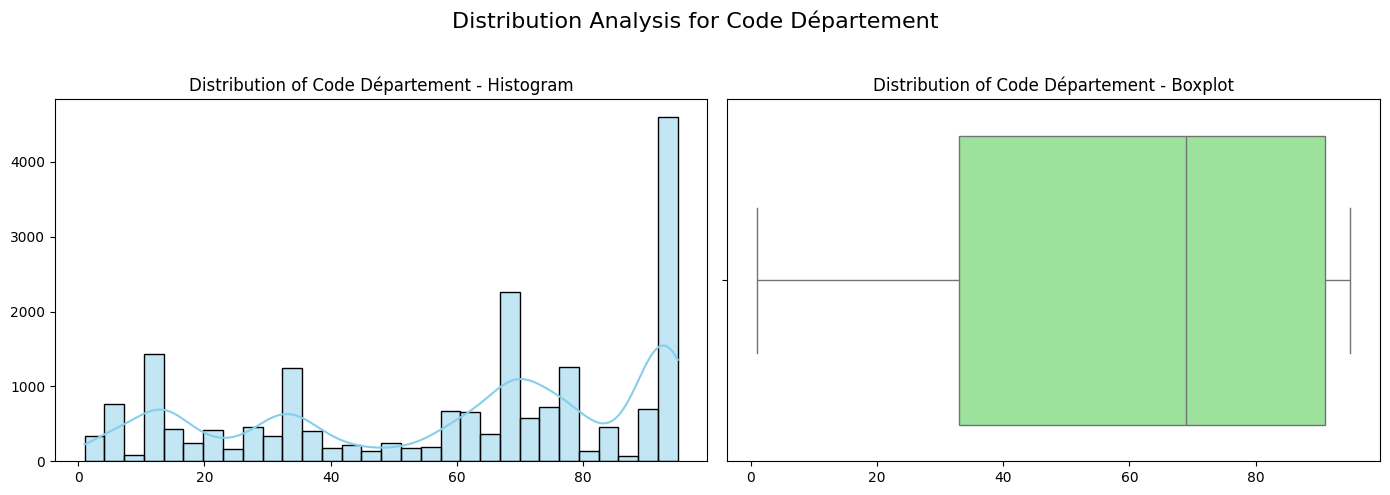

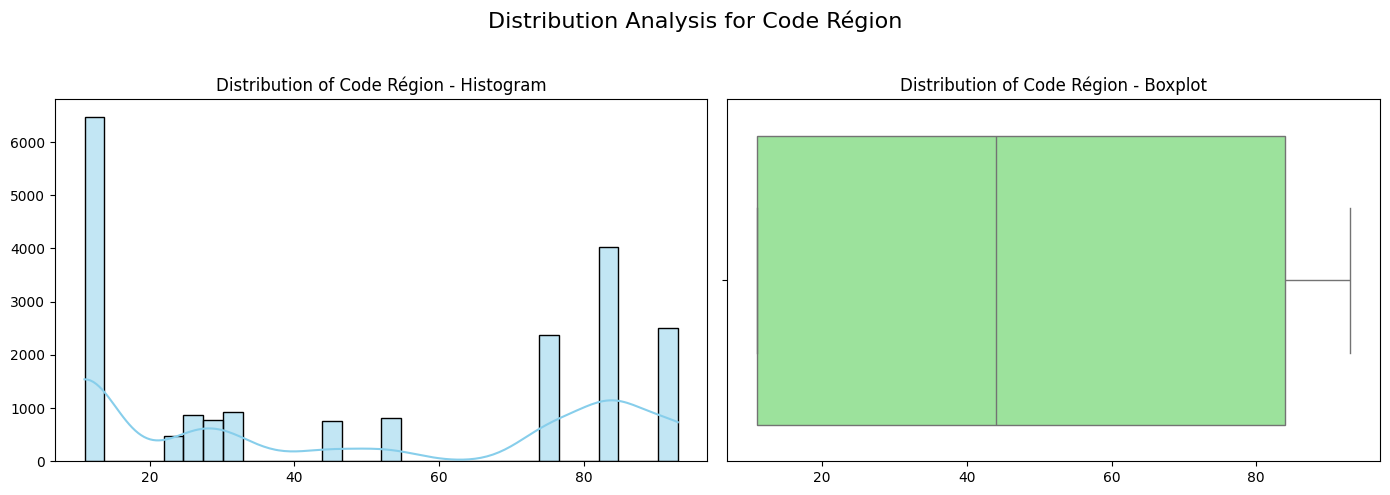

In [37]:
#plot_all_numerique(data_numerique)